In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.tree import DecisionTreeClassifier

# DT (Decision Tree)
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Titanic

## Get train and test

In [3]:
from functions import preprocess_titanic, SEED, generate_learning_curve, generate_validation_curve

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = preprocess_titanic()

## Baseline Learning Curve

In [6]:
estimator = DecisionTreeClassifier(random_state=SEED)

train wall clock: 0.0014769077301025391
test wall clock: 0.000885772705078125
train roc auc:  0.9993032783465585
test roc auc: 0.7784584980237155


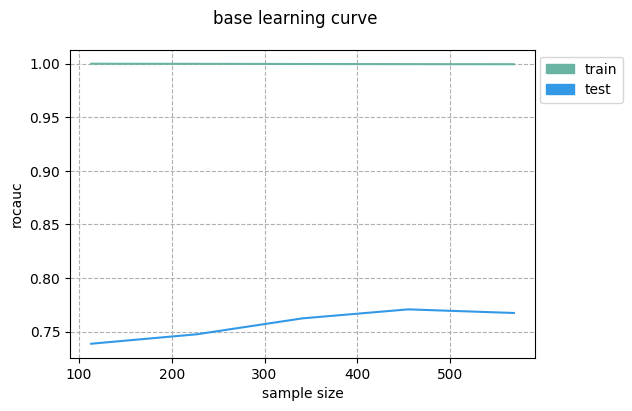

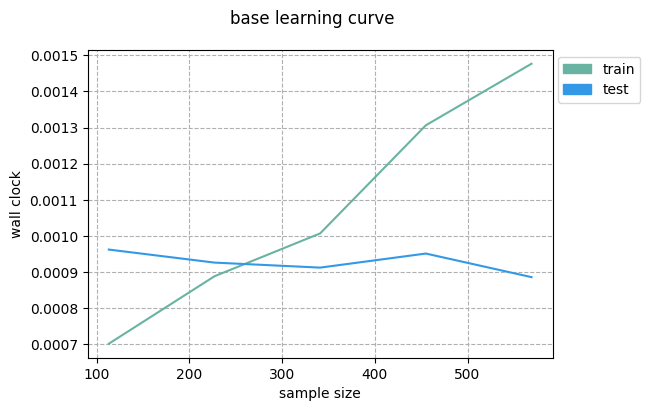

In [7]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve")

## Validation Curve

### Criterion

In [8]:
params = ["gini", "entropy", "log_loss"]
estimators = []
for param in params:
    estimator = DecisionTreeClassifier(random_state=SEED, criterion=param)
    estimators.append(estimator)

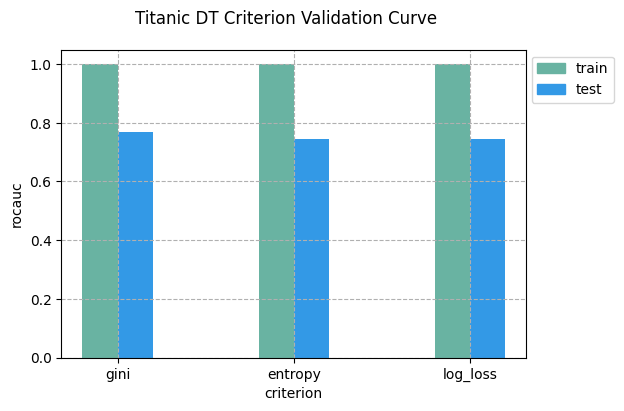

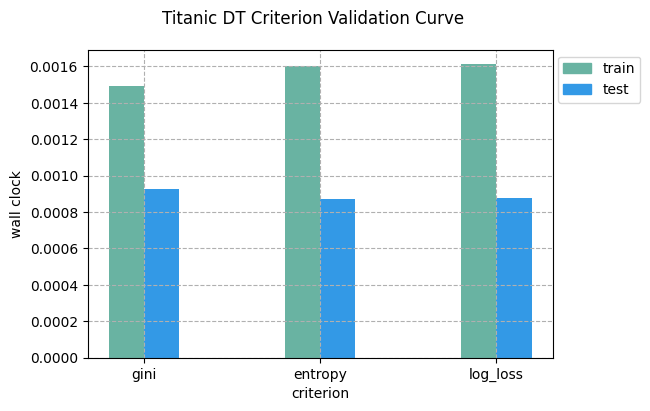

In [9]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "criterion", "Titanic DT Criterion Validation Curve", graph_type='bar')

### Pruning (PRE)

#### Max Depth

In [10]:
params = [1,2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = DecisionTreeClassifier(random_state=SEED, max_depth=param)
    estimators.append(estimator)

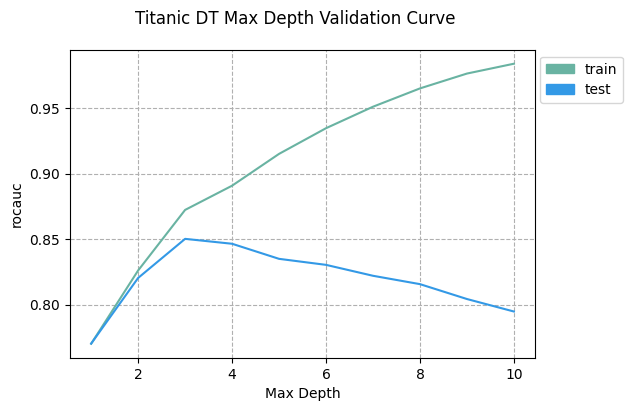

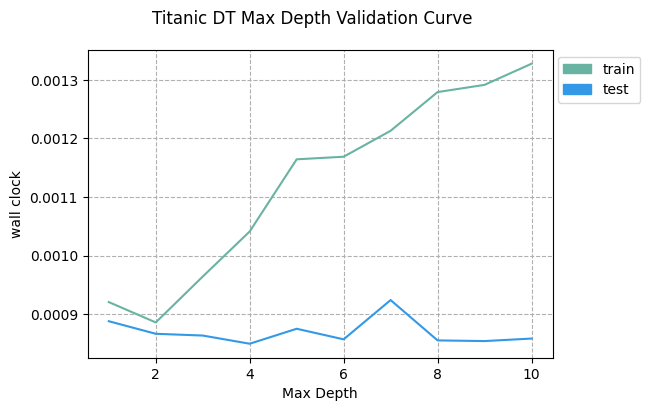

In [11]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Depth", "Titanic DT Max Depth Validation Curve", graph_type='line')

#### Max leaf Nodes

In [12]:
params = [2,3,4,5,6,7,8,9,10,11]
estimators = []
for param in params:
    estimator = DecisionTreeClassifier(random_state=SEED, max_depth=3,max_leaf_nodes=param)
    estimators.append(estimator)

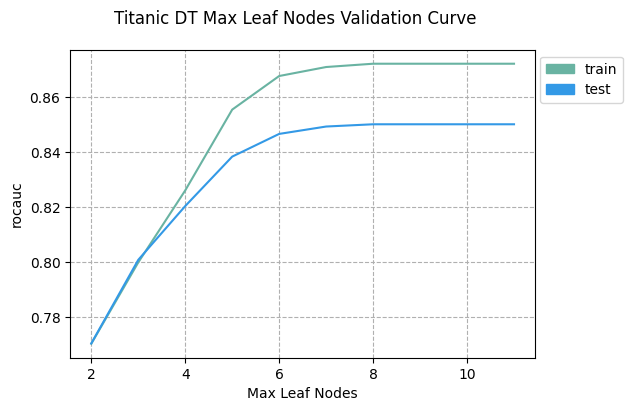

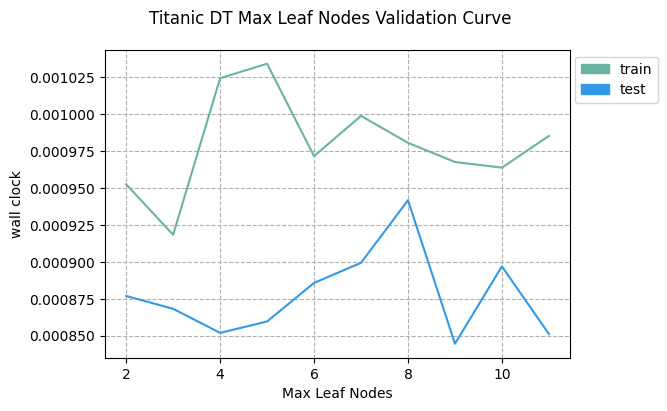

In [13]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Leaf Nodes", "Titanic DT Max Leaf Nodes Validation Curve", graph_type='line')

In [14]:
from functions import trigger_validate

train wall clock: 0.0009792327880859375
test wall clock: 0.0008494853973388672
train roc auc:  0.8665465134713426
test roc auc: 0.818445322793149


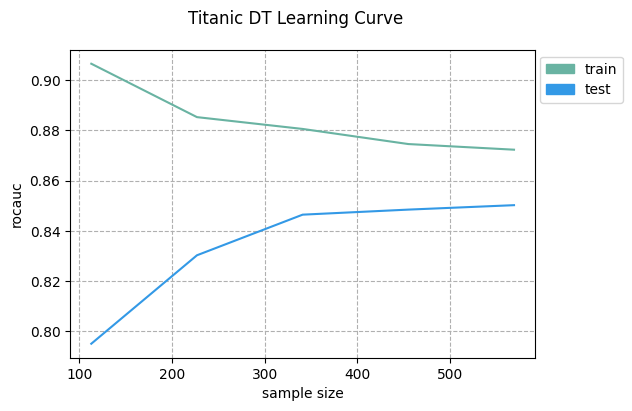

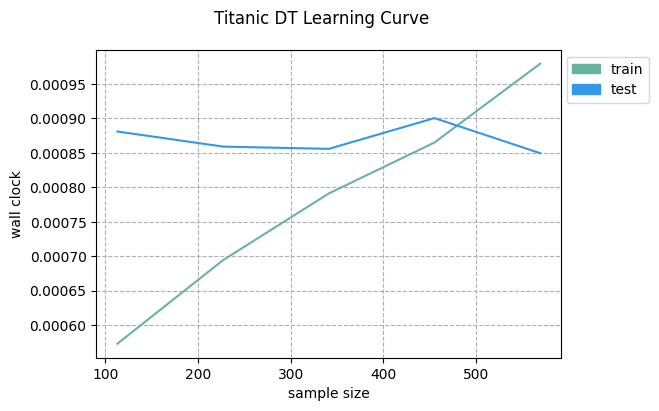

In [15]:
estimator = DecisionTreeClassifier(random_state=SEED, criterion="gini", max_depth=3,max_leaf_nodes=8)
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "Titanic DT Learning Curve")